Dinosty Fossils – 2025 Sales Analysis

This notebook contains the deep-dive analysis, statistical summary, visualizations, and insights based on the Combined_Sales_2025.csv dataset.
The goal is to understand which product types, grades, and markets contributed most to sales performance in 2025.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Combined_Sales_2025.csv")

df.head()

,Sale ID,Date,Item ID,Batch ID,Product Type,Species,Grade,Finish,Dominant Color,Color Count (#),...,Consignment? (Y/N),Consignment Owner,Export Permit (PDF link),length,width,weight,Channel_Type,Days_To_Ship,Jewelry Type,Metal Type
0,S-0001,2025-04-13,I-0001,B-2025-001,Gemstone,Ammolite Triplet,AA,Coated,Blue,2,...,N,NaN,C:\Permits\EXP-5000.pdf,63.0,39.0,14.2,Wholesale,70,NaN,NaN
1,S-0002,2025-09-28,I-0002,B-2025-002,Gemstone,Ammolite Triplet,A,Coated,Purple,2,...,N,NaN,C:\Permits\EXP-5001.pdf,39.0,42.0,10.8,Wholesale,1,NaN,NaN
2,S-0003,2025-04-17,I-0003,B-2025-003,Gemstone,Ammolite Triplet,AA,Coated,Orange,2,...,Y,NaN,C:\Permits\EXP-5002.pdf,64.0,21.0,10.0,Wholesale,208,NaN,NaN
3,S-0004,2025-03-13,I-0004,B-2025-004,Gemstone,Ammolite Triplet,AA,Coated,Red,3,...,Y,GemWorld,C:\Permits\EXP-5003.pdf,42.0,33.0,5.0,Wholesale,133,NaN,NaN
4,S-0005,2025-07-08,I-0005,B-2025-005,Gemstone,Ammolite Triplet,A,Coated,Orange,2,...,N,NaN,C:\Permits\EXP-5004.pdf,46.0,49.0,19.2,Wholesale,98,NaN,NaN


In [2]:
df["Net Revenue"] = df["Price (CAD)"] - df["Discount (CAD)"]

df.rename(columns={"weight": "Weight", "width": "Width", "length": "Length"}, inplace=True)

df.head()

,Sale ID,Date,Item ID,Batch ID,Product Type,Species,Grade,Finish,Dominant Color,Color Count (#),...,Consignment Owner,Export Permit (PDF link),Length,Width,Weight,Channel_Type,Days_To_Ship,Jewelry Type,Metal Type,Net Revenue
0,S-0001,2025-04-13,I-0001,B-2025-001,Gemstone,Ammolite Triplet,AA,Coated,Blue,2,...,NaN,C:\Permits\EXP-5000.pdf,63.0,39.0,14.2,Wholesale,70,NaN,NaN,820.85
1,S-0002,2025-09-28,I-0002,B-2025-002,Gemstone,Ammolite Triplet,A,Coated,Purple,2,...,NaN,C:\Permits\EXP-5001.pdf,39.0,42.0,10.8,Wholesale,1,NaN,NaN,162.41
2,S-0003,2025-04-17,I-0003,B-2025-003,Gemstone,Ammolite Triplet,AA,Coated,Orange,2,...,NaN,C:\Permits\EXP-5002.pdf,64.0,21.0,10.0,Wholesale,208,NaN,NaN,425.94
3,S-0004,2025-03-13,I-0004,B-2025-004,Gemstone,Ammolite Triplet,AA,Coated,Red,3,...,GemWorld,C:\Permits\EXP-5003.pdf,42.0,33.0,5.0,Wholesale,133,NaN,NaN,442.72
4,S-0005,2025-07-08,I-0005,B-2025-005,Gemstone,Ammolite Triplet,A,Coated,Orange,2,...,NaN,C:\Permits\EXP-5004.pdf,46.0,49.0,19.2,Wholesale,98,NaN,NaN,216.31


In [3]:
df.describe()

,Color Count (#),Price (CAD),Discount (CAD),Shipping (CAD),Taxes Collected (CAD),Length,Width,Weight,Days_To_Ship,Net Revenue
count,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,2.464217,6489.948424,47.558104,884.709778,81.975919,112.128338,88.492814,181.416103,88.142166,6442.390319
std,1.191766,9104.720602,222.946000,900.409047,225.991022,208.958934,177.313604,666.085857,93.444467,9048.415710
min,1.000000,53.080000,0.000000,0.000000,-1.860000,0.618000,0.157000,1.140000,0.000000,-64.400000
25%,1.000000,393.750000,0.000000,100.000000,0.000000,26.125000,16.000000,9.500000,5.000000,386.510000
50%,2.000000,1407.725000,0.000000,463.500000,0.000000,42.000000,30.000000,17.195000,57.000000,1388.500000
75%,3.000000,10175.210000,2.080000,1495.067500,15.750000,75.000000,59.607500,251.300000,157.000000,10153.842500
max,5.000000,50213.330000,2915.160000,2998.000000,1659.050000,999.200000,888.500000,12594.150000,314.000000,50013.330000


Statistical Summary – Interpretation

The statistical summary helps validate the dataset and understand the overall scale of Dinosty’s 2025 sales:

Average Price (≈ $6,490 CAD)
Indicates that most items sold are mid-to-high value pieces.

High Standard Deviation in Price and Net Revenue
Shows a wide price range — expected because fossils vary greatly by rarity, size, and grade.

Minimum Net Revenue is slightly negative
Likely due to high discounts on some items.

Days_To_Ship averages around 88 days
Shipping times are long, which may affect customer satisfaction.

Large variation in Length, Width, Weight
Reflects how diverse the physical products are (small specimens vs. large ammonites).

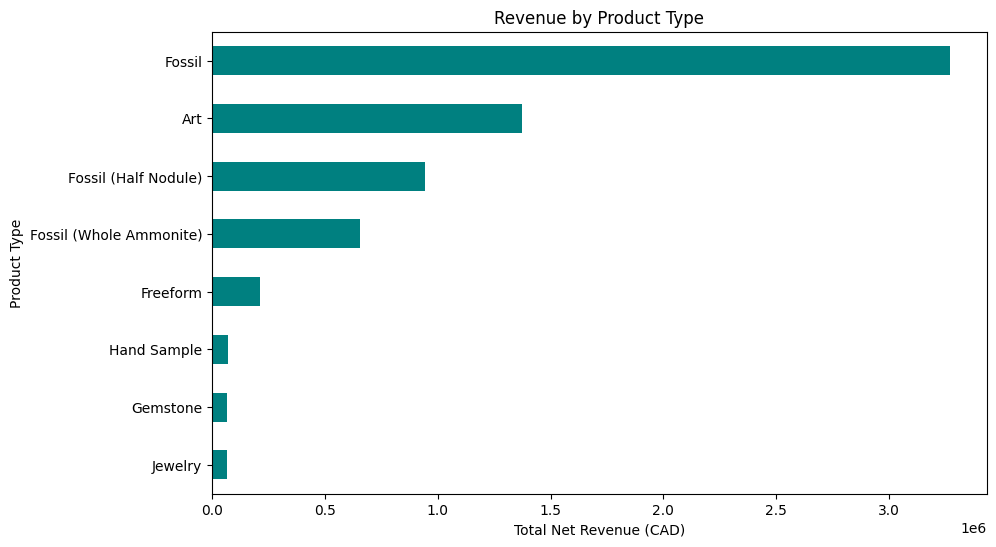

In [4]:
rev_by_type = df.groupby("Product Type")["Net Revenue"].sum().sort_values()

plt.figure(figsize=(10,6))
rev_by_type.plot(kind="barh", color="teal")
plt.title("Revenue by Product Type")
plt.xlabel("Total Net Revenue (CAD)")
plt.ylabel("Product Type")
plt.show()

<Figure size 1200x700 with 0 Axes>

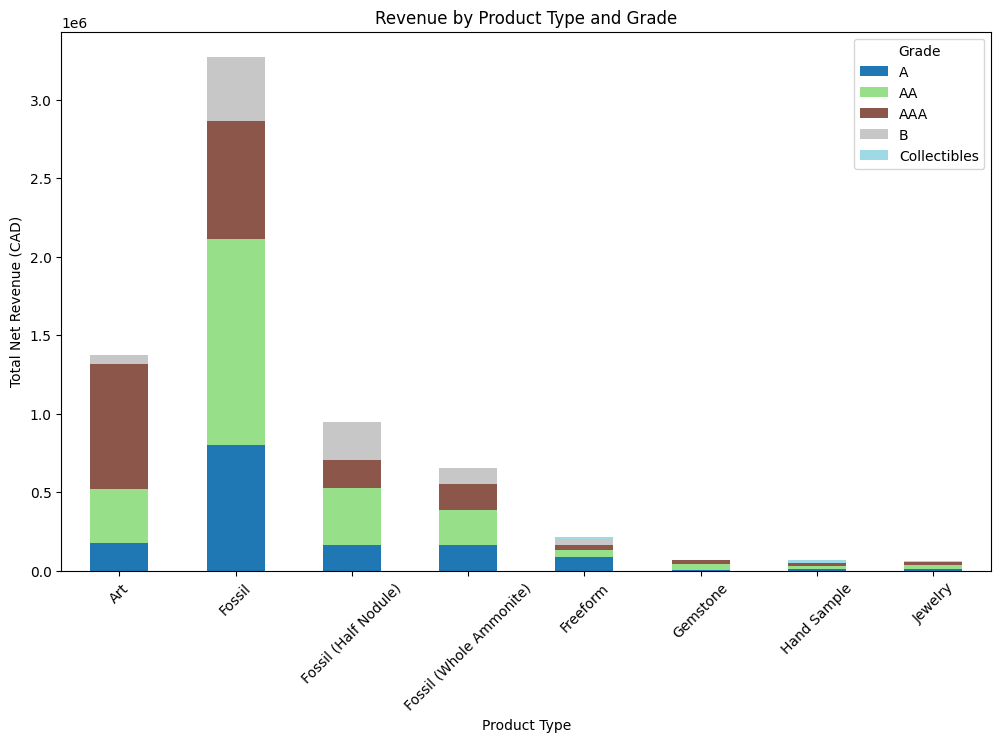

In [5]:
rev_type_grade = df.pivot_table(
    index="Product Type",
    columns="Grade",
    values="Net Revenue",
    aggfunc="sum",
    fill_value=0
)

plt.figure(figsize=(12,7))
rev_type_grade.plot(kind="bar", stacked=True, figsize=(12,7), colormap="tab20")
plt.title("Revenue by Product Type and Grade")
plt.xlabel("Product Type")
plt.ylabel("Total Net Revenue (CAD)")
plt.legend(title="Grade")
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

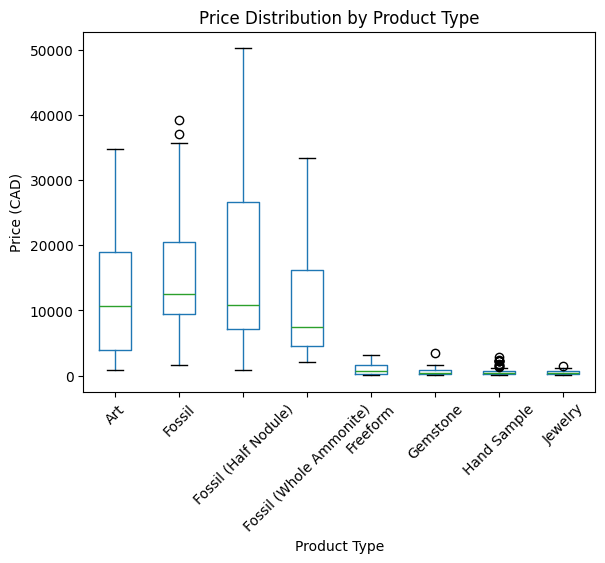

In [6]:
plt.figure(figsize=(12,6))
df.boxplot(column="Price (CAD)", by="Product Type", grid=False, rot=45)
plt.title("Price Distribution by Product Type")
plt.suptitle("")  # remove default subtitle
plt.xlabel("Product Type")
plt.ylabel("Price (CAD)")
plt.show()

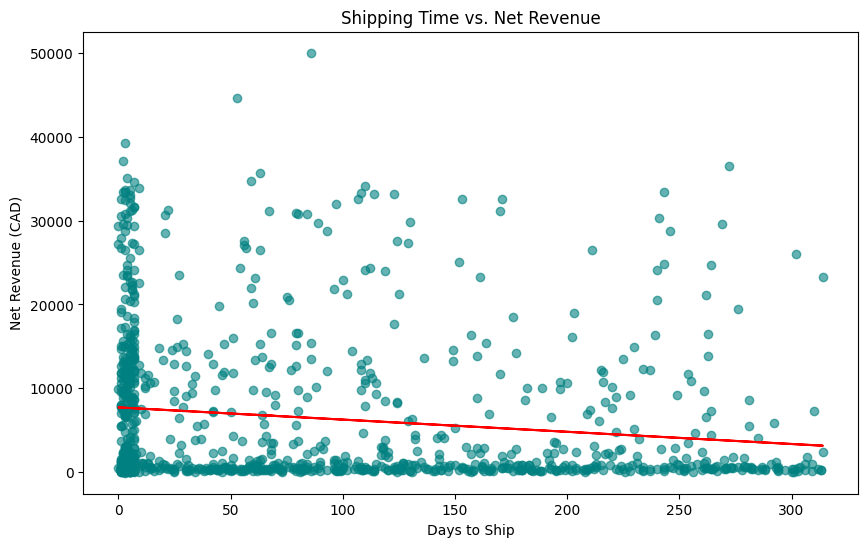

In [7]:
plt.figure(figsize=(10,6))

plt.scatter(df["Days_To_Ship"], df["Net Revenue"], alpha=0.6, color="teal")
plt.title("Shipping Time vs. Net Revenue")
plt.xlabel("Days to Ship")
plt.ylabel("Net Revenue (CAD)")

# Add a trendline
z = np.polyfit(df["Days_To_Ship"], df["Net Revenue"], 1)
p = np.poly1d(z)
plt.plot(df["Days_To_Ship"], p(df["Days_To_Ship"]), color="red")

plt.show()

Insight – Shipping Time vs. Net Revenue

This scatter plot examines whether expensive fossil products take longer to ship.

Key findings:

Points are widely scattered, showing no strong correlation between price and shipping time.

Trendline is relatively flat → meaning expensive items do not necessarily take longer to process.

A few outliers with long shipping times likely represent large, fragile fossils that require special handling.

---------------------------------------------------------------------------------------------------------------

Overall Insights & Recommendations
1. Product Mix Performance

Fossil categories (Whole Ammonite, Half Nodule, etc.) generate the majority of total revenue.

Art pieces contribute significantly but are secondary to fossils.

Lower-value categories like Jewelry, Gemstone, and Hand Sample provide modest revenue but strong volume.

Recommendation:
Continue prioritizing fossil inventory and expand sourcing of mid-to-high grade pieces (A, AA, AAA).

2. Grade-Level Contribution

AA and AAA grades consistently drive higher revenue across most product types.

B and Collectibles grades contribute less and may serve more as entry-level items.

Recommendation:
Strengthen pricing strategy on premium grades; evaluate demand elasticity on B-grade products.

3. Pricing Distribution

Fossils and Art show wide price variability, indicating diverse product offerings.

Some categories have tight price ranges, suggesting stable customer benchmarks.

Recommendation:
Use detailed grading and rarity descriptors to explain price differences to customers and support higher-value sales.

4. Shipping Time vs Revenue

No strong correlation between item value and Days To Ship.

Occasional long shipping times appear to be special-case items (fragile or oversized fossils).

Recommendation:
Investigate shipping delays for outliers and optimize fulfillment processes for bulky shipments.

5. Operational Takeaways

Shipping averages around 88 days, which is long for retail.

Improving logistics could positively impact customer satisfaction and repeat purchases.

Recommendation:
Consider partnerships with specialized fossil freight providers; improve pre-shipping prep workflows.

Final Summary

This analysis identifies which products and grades drive sales, how pricing varies across categories, and highlights opportunities in logistics and sourcing.
The findings support strategic decisions around inventory, marketing focus, and operational optimization.